In [1]:
from mcts_borrowed import MCTS
from utt2 import UTTNode
from tqdm import tqdm
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
import numpy as np

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [3]:
def random_choose(board):
    return board.find_random_child()

def benchmark(n_games, player):
    results = {"Model": 0, "Baseline": 0, "Tie": 0}
    #double_c = {1 : 0, -1:0}
    for i in range(n_games):
        
        board = UTTNode(current_player=1)
        for i in range(300):
            #player.do_rollout(board)
            #player.do_rollout(board)
            board = player.choose(board)
            if board.is_terminal():
                #print("a")
                break
            #random_move
            board = board.find_random_child()
            if board.is_terminal():
                #print("b")
                #print(board)
                
                break
        #double_c[board.current_player] =  double_c[board.current_player] +1
        result = board.reward()
        #print(board.current_player)
        if result ==1:
            results["Model"] +=1
        elif result == -1:
            results["Baseline"] += 1
        else:
            results["Tie"]+=1
    #print(double_c)
    return results

In [4]:
def play_game(x, o = None):
    board = UTTNode(current_player=1)
    #while not board.is_terminal():
    
    for i in range(300):
        # You can train as you go, or only at the beginning.
        # Here, we train as we go, doing fifty rollouts each turn.
        x.do_rollout(board)
        board = x.choose(board)
        
        if board.is_terminal():
            #print(board)
            break
        if o is None:
            board = random_choose(board)
        else:
            o.do_rollout(board)
            board = o.choose(board)
        if board.is_terminal():
            #print(board)
            break
    return board.reward()

In [5]:
n_games = 10
test = MCTS(3, 1)

data = {"uct": [],"vanilla": []}
for i in tqdm(range(n_games)):
    bench_x = benchmark(25, test)
    #print(bench_x)
    data["uct"].append((bench_x["Model"]-bench_x["Baseline"])/25)
    result = play_game(test)

 68%|██████▊   | 339/500 [9:50:30<4:40:27, 104.52s/it] 


KeyboardInterrupt: 

In [ ]:
results = {"X": 0, "O": 0, "Tie": 0}
X = MCTS(5, 1)
O = MCTS(5,-1, "norm")
for i in tqdm(range(20)):
    result = play_game(X, O)
    #print("max: ", max(X.Q.values()), "\n",
    #"min: ", min(X.Q.values()))
    if result ==1:
        results["X"] +=1
    elif result == -1:
        results["O"] += 1
    else:
        results["Tie"]+=1

100%|██████████| 20/20 [04:30<00:00, 13.52s/it]


In [ ]:
#print(benchmark(100, X))

KeyboardInterrupt: 

100%|██████████| 100/100 [1:03:41<00:00, 38.22s/it]


In [ ]:
import numpy as np
def plotting(data, title):
    for key, value in data.items():
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5) 
        plt.plot(np.arange(n_games), value, label = key)
    plt.ylabel("Wins-Losses divided by number of test games")
    plt.legend()
    plt.title(title)

In [ ]:
n_games = 100
n_benchmark = 100
X = MCTS(5, 1)
O = MCTS(5, 1, "norm")

data2 = {"uct": [],"vanilla": []}
for i in tqdm(range(n_games)):
    bench_x = benchmark(n_benchmark, X)
    bench_o = benchmark(n_benchmark, O)
    #print(bench_x)
    data2["uct"].append((bench_x["Model"]-bench_x["Baseline"])/n_benchmark)
    data2["vanilla"].append((bench_o["Model"]-bench_o["Baseline"])/n_benchmark)
    result = play_game(X)
    result = play_game(O)

  0%|          | 0/100 [00:04<?, ?it/s]


KeyboardInterrupt: 

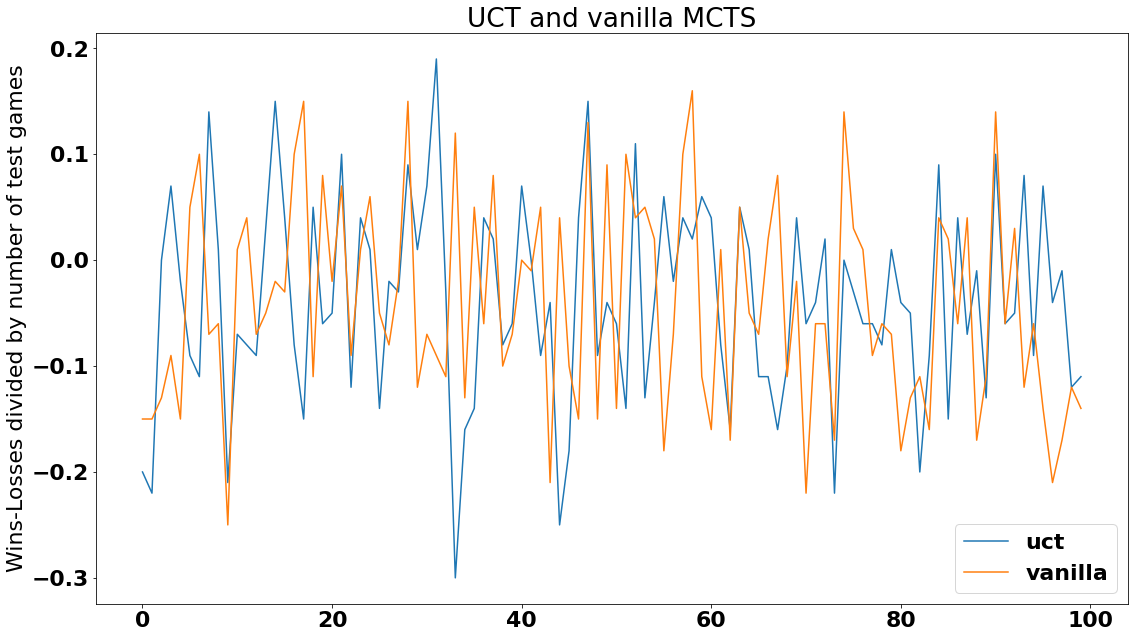

In [ ]:
plotting(data2, "UCT and vanilla MCTS")

In [ ]:
X_1 = MCTS(10, 1)
X_5 = MCTS(15,1)

data3 = {"uct_1": [],"uct_10": []}
for i in tqdm(range(n_games)):
    bench_x1 = benchmark(n_benchmark, X_1)
    bench_x10 = benchmark(n_benchmark, X_5)
    #print(bench_x)
    data3["uct_1"].append((bench_x1["Model"]-bench_x1["Baseline"])/n_benchmark)
    data3["uct_10"].append((bench_x10["Model"]-bench_x10["Baseline"])/n_benchmark)
    result = play_game(X_1)
    result = play_game(X_5)

 49%|████▉     | 49/100 [58:10<1:00:32, 71.23s/it] 


KeyboardInterrupt: 

In [ ]:
plotting(data3, "UCT with 1 and 5 simulations")

TypeError: plotting() missing 1 required positional argument: 'title'

In [ ]:

X = MCTS(5, 1)
O = MCTS(5,-1, "norm")

data4 = {"uct": [],"vanilla": []}
for i in tqdm(range(n_games)):
    bench_x = benchmark(n_benchmark, X)
    bench_o = benchmark(n_benchmark, O)
    #print(bench_x)
    data4["uct"].append((bench_x["Model"]-bench_x["Baseline"])/n_benchmark)
    data4["vanilla"].append((bench_o["Model"]-bench_o["Baseline"])/n_benchmark)
    result = play_game(X, O)
    

In [ ]:
plotting(data4, "UCT vs vanilla MCTS")